In [85]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile,join
from time import sleep
def P2dB(P): return 10*np.log10(np.abs(P))

In [86]:
#Sis=[ 0, 1, 2, 3, 4, 5,24,25,26,27,28,29,72,73,74,75,76, 77,90,91,92,93,94,95]
#Sis=[ 0, 1, 2, 3, 4, 5,72,73,74,75,76, 77,90,91,92,93,94,95]
#meas_RCU2L = [0, 1, 6, 7, 28, 29]
meas_RCU2L = [0, 1, 2,3,4,5]
Sis = [3*i+j for i in meas_RCU2L for j in range(3)]
sis=Sis

In [87]:
from xsts import XSTs

In [95]:
xst1=XSTs("xst")

XST files= 335 , Bands= [318 319 320 321 322]


In [96]:
from datetime import datetime
freqs=np.array(bands)/512*100
#sis=[x for x in range(18)]
band=318
print("freq=",freqs[band])
print(band)
Nsis=len(sis)

freq= 62.109375
318


In [161]:
tstart=datetime.fromisoformat("2022-11-18 23:58:30") #3 min avg, 1.5 minutes before and after
tend  =datetime.fromisoformat("2022-11-19 23:58:30")
D=xst1.GetBand(band,tstart,tend,sis)
print(D.shape)


Load XST xst/XST_SB318_2022-11-18-23-20-00.h5
Load XST xst/XST_SB318_2022-11-19-00-20-00.h5
Load XST xst/XST_SB318_2022-11-19-01-20-00.h5
Load XST xst/XST_SB318_2022-11-19-02-20-00.h5
Load XST xst/XST_SB318_2022-11-19-03-20-00.h5
Load XST xst/XST_SB318_2022-11-19-04-20-00.h5
Load XST xst/XST_SB318_2022-11-19-05-20-00.h5
Load XST xst/XST_SB318_2022-11-19-06-20-00.h5
Load XST xst/XST_SB318_2022-11-19-07-20-00.h5
Load XST xst/XST_SB318_2022-11-19-08-20-00.h5
Load XST xst/XST_SB318_2022-11-19-09-20-00.h5
Load XST xst/XST_SB318_2022-11-19-10-20-00.h5
Load XST xst/XST_SB318_2022-11-19-11-20-00.h5
Load XST xst/XST_SB318_2022-11-19-12-20-00.h5
Load XST xst/XST_SB318_2022-11-19-13-20-00.h5
Load XST xst/XST_SB318_2022-11-19-14-20-00.h5
Load XST xst/XST_SB318_2022-11-19-15-20-00.h5
Load XST xst/XST_SB318_2022-11-19-16-20-00.h5
Load XST xst/XST_SB318_2022-11-19-17-20-00.h5
Load XST xst/XST_SB318_2022-11-19-18-20-00.h5
Load XST xst/XST_SB318_2022-11-19-19-20-00.h5
Load XST xst/XST_SB318_2022-11-19-

In [162]:
n0,s1,s2=D.shape
n1=60*3 #3 min average
n2=n0//n1
D2=np.mean(D[:n1*n2].reshape([n2,n1,s1,s2]),axis=1)
print(D2.shape)


(480, 18, 18)


In [163]:
mins=np.arange(n2)*n1/60
hrs=mins/60
LBAs=np.array([72,77,83,88,90,92,93,94,95])
pair1=[1,0]

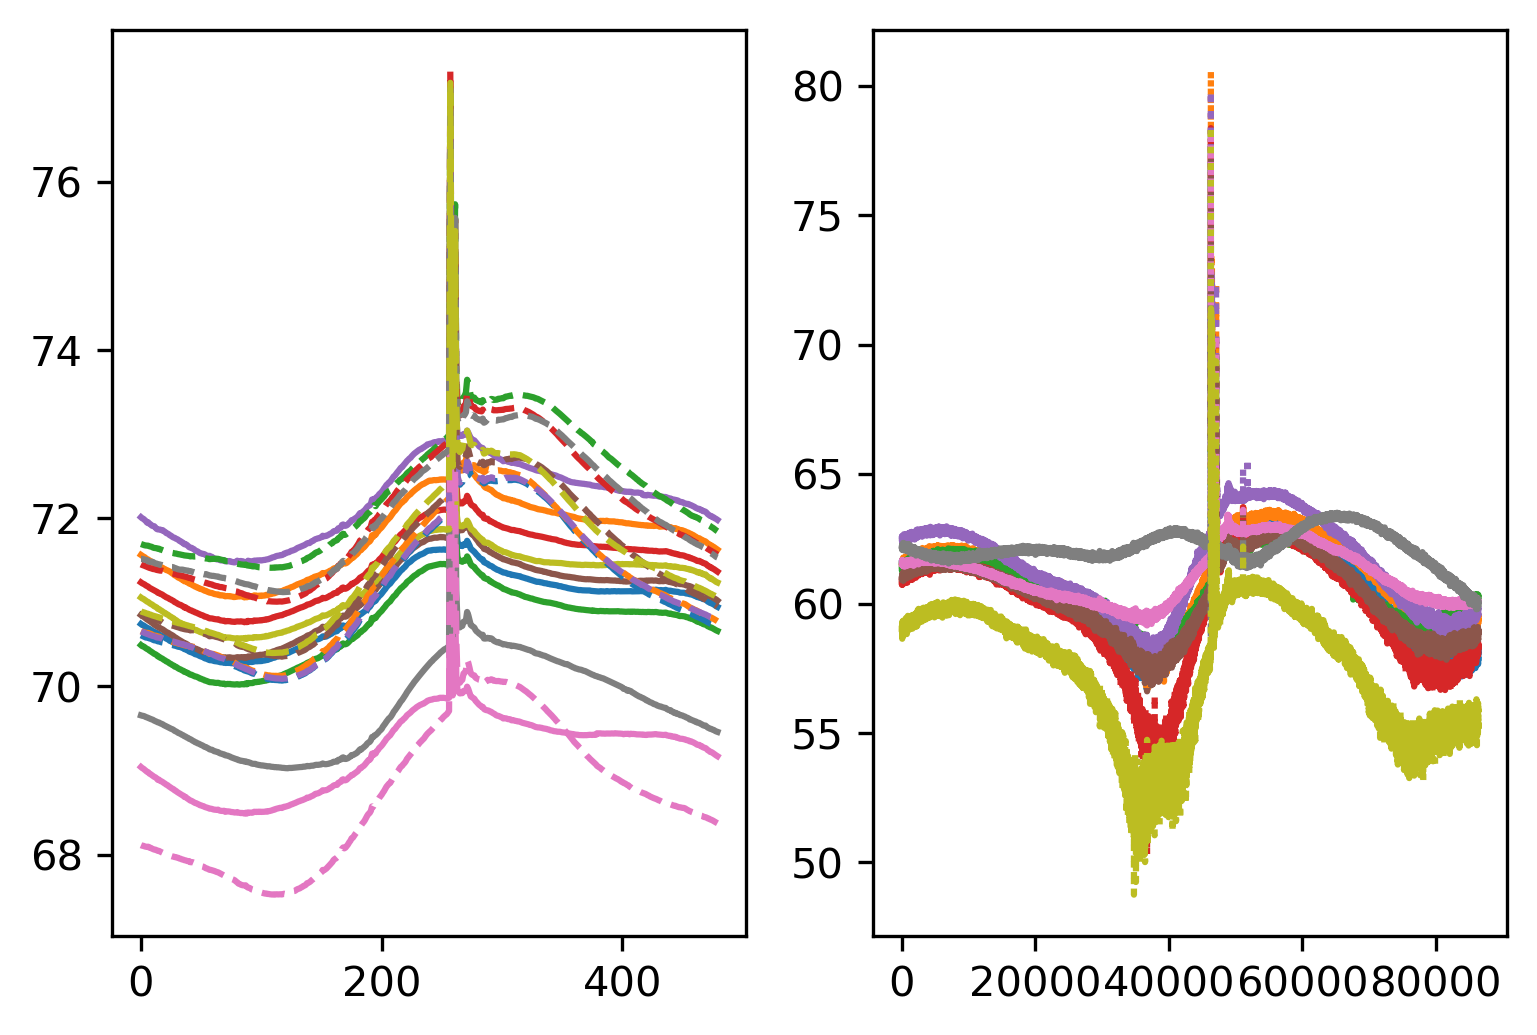

In [164]:
plt.figure(dpi=300)
def P2dB(D): return 10*np.log10(np.abs(D))
plt.subplot(1,2,1)
for x in range(9):
    plt.plot(P2dB(D2[:,2*x,2*x]))
plt.gca().set_prop_cycle(None)
for x in range(9):
    plt.plot(P2dB(D2[:,2*x+1,2*x+1]),'--')
plt.gca().set_prop_cycle(None)
plt.subplot(1,2,2)
for x in range(9):
    plt.plot(P2dB(D[:,2*x,2*x+1]),':')

In [165]:
vis=np.load("vis_L2TS_LBA_62MHz_2022-11-19-00-00-00_3min.npy")
print(vis.shape)

(480, 9, 9, 2)


In [171]:
plt.figure(dpi=300)
plt.subplot(1,2,1)
for x in range(1):
    plt.plot(hrs,P2dB(D2[:,2*3,0]),'k',label='X%i-X%i'%(LBAs[3],LBAs[0]))
plt.plot(hrs,P2dB(vis[:,3,0,0])-26,'r-',label='Simulated');
plt.ylabel("Power (dB)")
plt.xlabel("Time (hours)")
plt.legend(ncol=2,fontsize=4)
plt.subplot(1,2,2)
for x in range(1):
    plt.plot(hrs,np.angle(D2[:,2*3,0])/np.pi*180,'k.')

plt.plot(hrs,-(np.angle(vis[:,3,0,0]))/np.pi*180,'r.');
plt.plot(hrs,(np.angle(D2[:,2*3,0]*vis[:,3,0,0]))/np.pi*180,'b.',markersize=1);
plt.ylabel("Phase (deg)")
plt.xlabel("Time (hours)")
#plt.plot(hrs,-(np.angle(vis[:,1,0,1]))/np.pi*180,'.');


Text(0.5, 0, 'Time (hours)')

In [174]:
plt.figure(dpi=300)
order=[0,3,4,1,5,6,7,2,8,0]

pairs=[[order[x],order[x+1]] for x in range(9)]
for p1,p2 in pairs:
    i1=p1*2
    sign=-1 if 83 in [LBAs[p1],LBAs[p2]] else 1
    if 93 in [LBAs[p1],LBAs[p2]]: continue
    i2=p2*2
    if p1<p2:
        plt.plot(hrs,np.angle(sign*D2[:,i2,i1]*vis[:,p2,p1,0])/np.pi*180,'.',label='X%i-X%i'%(LBAs[p1],LBAs[p2]))
    else:
        plt.plot(hrs,np.angle(sign*D2[:,i1,i2]*vis[:,p1,p2,0])/np.pi*180,'.',label='X%i-X%i'%(LBAs[p2],LBAs[p1]))
#plt.plot(hrs,np.angle(D2[:,2,0]*vis[:,1,0,1])/np.pi*180,'.',label='X-1')
#plt.plot(hrs,np.angle(D2[:,3,1]*vis[:,1,0,0])/np.pi*180,'.',label='Y-0')
#plt.plot(hrs,np.angle(D2[:,3,1]*vis[:,1,0,1])/np.pi*180,'.',label='Y-1')
plt.legend(ncol=3,fontsize='small')
plt.xlim(0,24);plt.xlabel("Time (hours)")
plt.ylim(-180,180);plt.ylabel("Phase (deg)")
plt.title("Simulated vs measured XSTs\n (2022-11-19,band %i,%.1fMHz,3min avg)"%(band,freqs[band]))

Text(0.5, 1.0, 'Simulated vs measured XSTs\n (2022-11-19,band 318,62.1MHz,3min avg)')

Text(0.5, 1.0, 'Simulated vs measured XSTs\n (2022-11-19,band 318,62.1MHz,3min avg)')

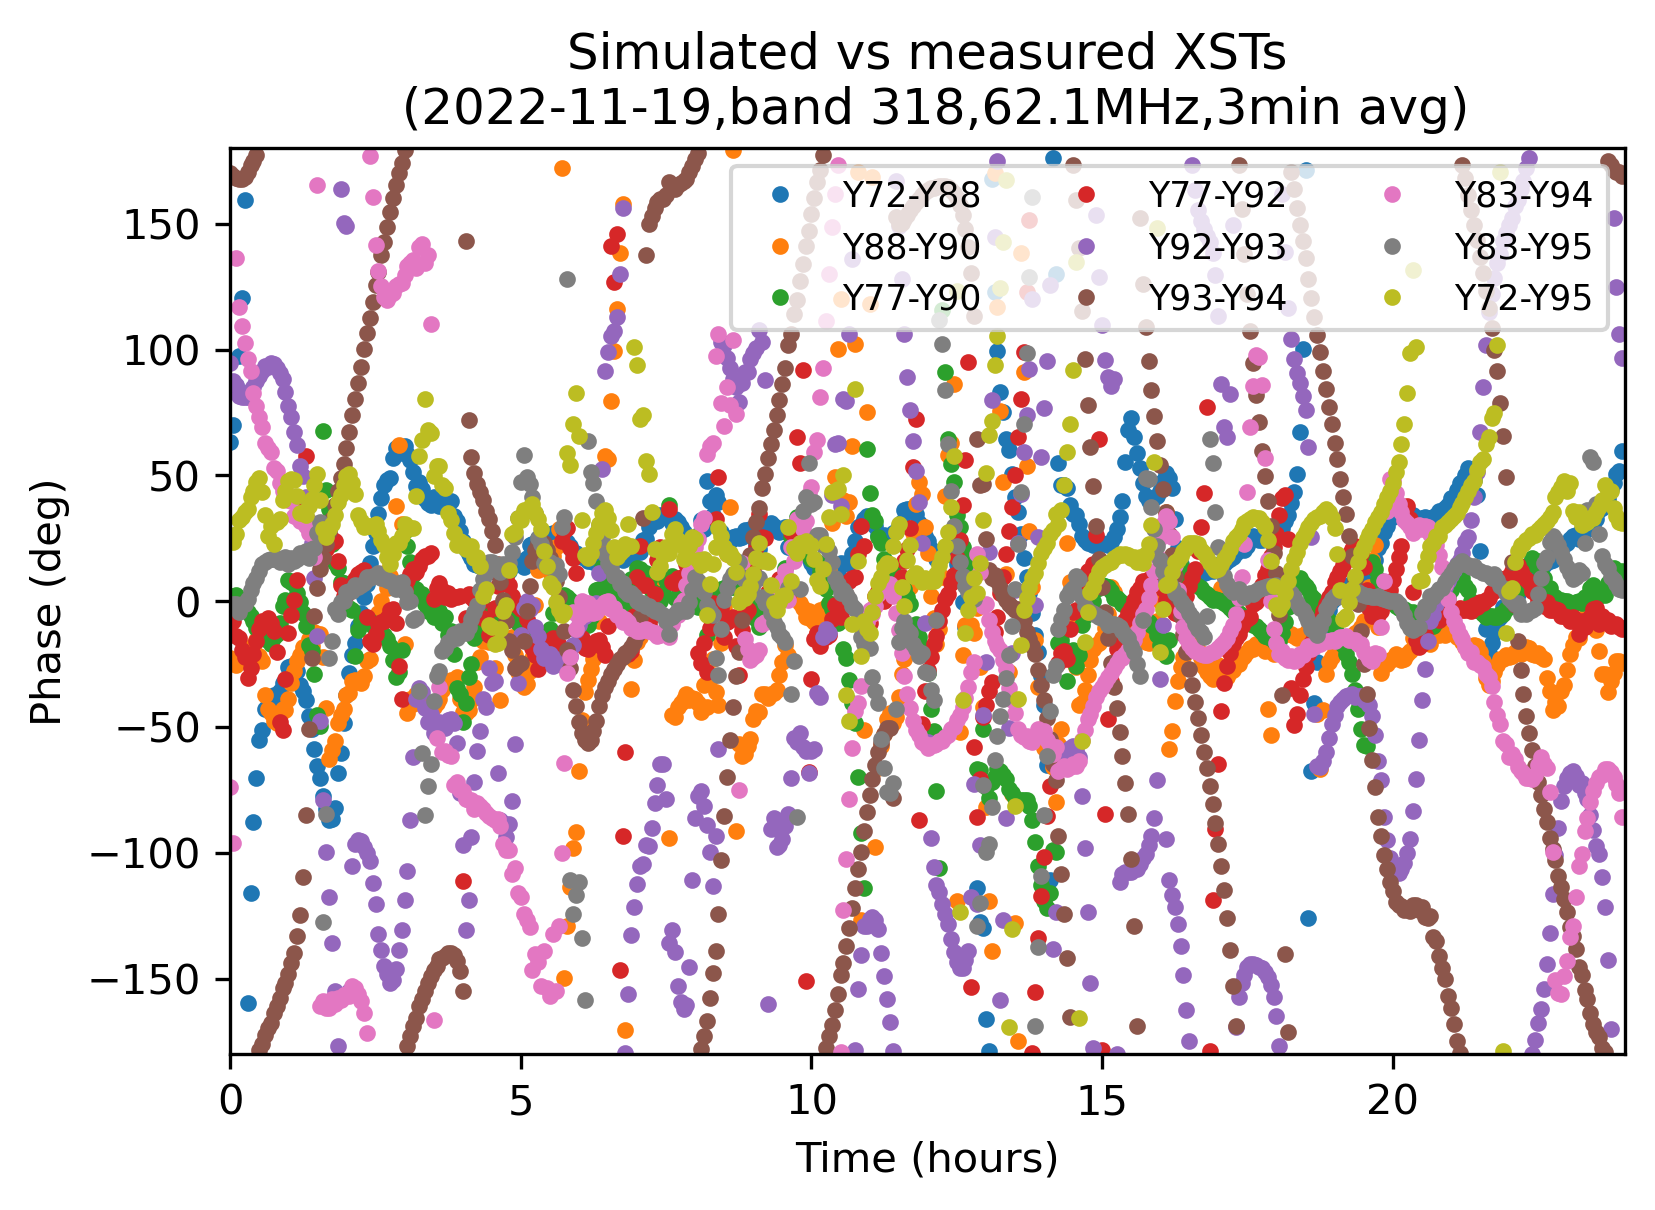

In [173]:
plt.figure(dpi=300)
order=[0,3,4,1,5,6,7,2,8,0]

pairs=[[order[x],order[x+1]] for x in range(9)]
for p1,p2 in pairs:
    i1=p1*2+1
    i2=p2*2+1
    sign=-1 if 83 in [LBAs[p1],LBAs[p2]] else 1
    if p1<p2:
        plt.plot(hrs,np.angle(sign*D2[:,i2,i1]*vis[:,p2,p1,1])/np.pi*180,'.',label='Y%i-Y%i'%(LBAs[p1],LBAs[p2]))
    else:
        plt.plot(hrs,np.angle(sign*D2[:,i1,i2]*vis[:,p1,p2,1])/np.pi*180,'.',label='Y%i-Y%i'%(LBAs[p2],LBAs[p1]))
#plt.plot(hrs,np.angle(D2[:,2,0]*vis[:,1,0,1])/np.pi*180,'.',label='X-1')
#plt.plot(hrs,np.angle(D2[:,3,1]*vis[:,1,0,0])/np.pi*180,'.',label='Y-0')
#plt.plot(hrs,np.angle(D2[:,3,1]*vis[:,1,0,1])/np.pi*180,'.',label='Y-1')
plt.legend(ncol=3,fontsize='small')
plt.xlim(0,24);plt.xlabel("Time (hours)")
plt.ylim(-180,180);plt.ylabel("Phase (deg)")
plt.title("Simulated vs measured XSTs\n (2022-11-19,band %i,%.1fMHz,3min avg)"%(band,freqs[band]))

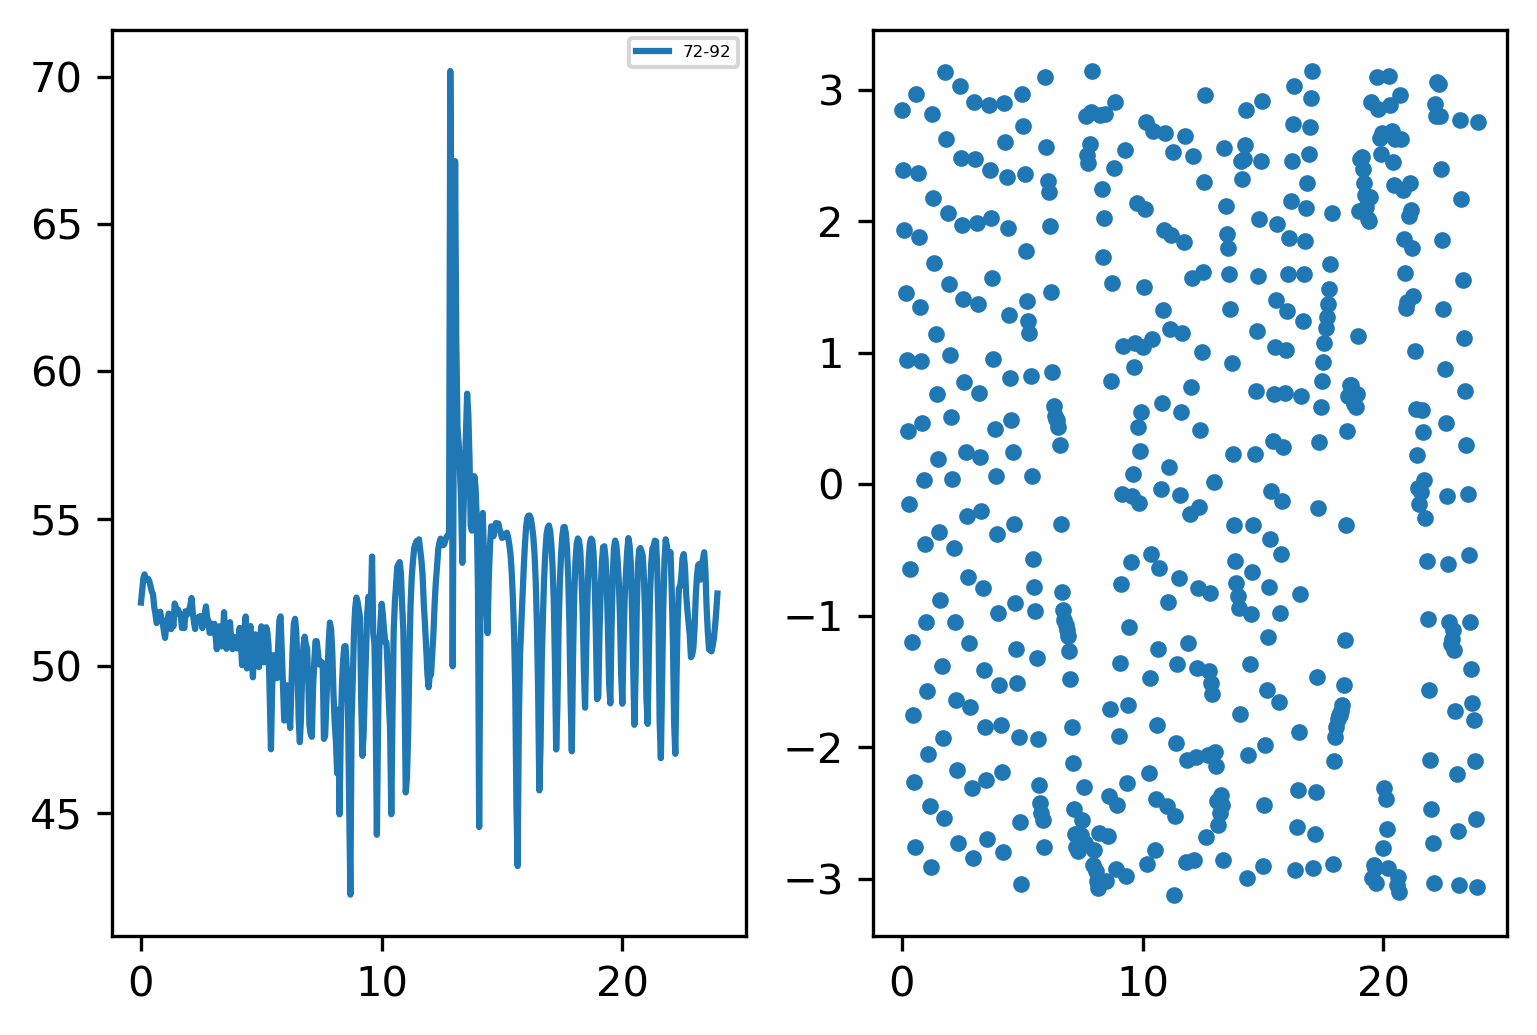

In [169]:
plt.figure(dpi=300)
plt.subplot(1,2,1)
for x in range(1):
    plt.plot(hrs,P2dB(D2[:,2*order[x+4],2*order[x]]),label='%i-%i'%(LBAs[order[x]],LBAs[order[x+4]]))
plt.legend(ncol=2,fontsize=4)
plt.subplot(1,2,2)
for x in range(1):
    plt.plot(hrs,np.angle(D2[:,2*order[x+4],2*order[x]]),'.')

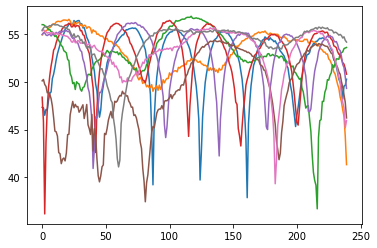

In [73]:
for x in range(8):
    plt.plot(P2dB(D2[:,2+x*2+1,1]))

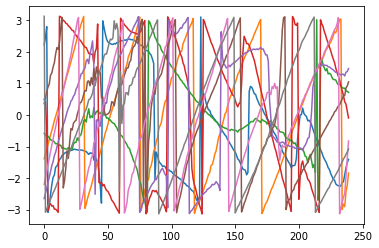

In [74]:
for x in range(8):
    plt.plot(np.angle(D2[:,2+x*2+1,1]))